In [9]:
import os
import torchaudio
import torch
from EgoExoEMS.EgoExoEMS import EgoExoEMSDataset, collate_fn, transform


In [7]:
root = "/standard/UVA-DSA/NIST EMS Project Data/CognitiveEMS_Datasets/North_Garden/May_2024/May24_updated_structure/ego_camera/ng1/1/"  # Folder in which all videos lie in a specific structure
annotation_file = "../../Annotations/main_annotation.json"  # A row for each video sample as: (VIDEO_PATH START_FRAME END_FRAME CLASS_ID)

train_annotation_file = "../../Annotations/splits/keysteps/train_split.json"  # A row for each video sample as: (VIDEO_PATH START_FRAME END_FRAME CLASS_ID)
val_annotation_file = "../../Annotations/splits/keysteps/val_split.json"  # A row for each video sample as: (VIDEO_PATH START_FRAME END_FRAME CLASS_ID)
test_annotation_file = "../../Annotations/splits/keysteps/test_split.json"  # A row for each video sample as: (VIDEO_PATH START_FRAME END_FRAME CLASS_ID)

train_dataset = EgoExoEMSDataset(annotation_file=train_annotation_file,
                                data_base_path='',
                                fps=30, frames_per_clip=None, transform=transform)

# Access a sample
print(len(train_dataset))





10


In [10]:
# create a data loader
# batch size is 1 for simplicity and to ensure only a full clip related to a key step is given without collating.
# if batch size is greater than 1, collate_fn will be called to collate the data.
data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)

In [11]:
# Iterate over the data loader and print the shape of the batch
for batch in data_loader:
    print(batch['frames'].shape, batch['audio'].shape, batch['flow'].shape, batch['rgb'].shape, batch['keystep_label'], batch['keystep_id'], batch['start_frame'], batch['end_frame'],batch['start_t'], batch['end_t'],  batch['subject_id'], batch['trial_id'])
    # audio_tensor = batch['audio'][0]
    # #transpose
    # audio_tensor = audio_tensor.transpose(0,1)
    # torchaudio.save("audio.wav", audio_tensor,48000)
    break   

video_path:  /standard/UVA-DSA/NIST EMS Project Data/CognitiveEMS_Datasets/North_Garden/May_2024/May24_updated_structure/ego_camera/ng1/1/GX010305.MP4
flow_path:  /standard/UVA-DSA/NIST EMS Project Data/CognitiveEMS_Datasets/North_Garden/May_2024/May24_updated_structure/i3d_flow/ng1/1/GX010305_clipped_flow.npy
rgb_path:  /standard/UVA-DSA/NIST EMS Project Data/CognitiveEMS_Datasets/North_Garden/May_2024/May24_updated_structure/i3d_rgb/ng1/1/GX010305_clipped_rgb.npy
start_frame:  3937
end_frame:  4361


/home/cjh9fw/.local/lib/python3.8/site-packages/torchvision/io/video_reader.py:245: UserWarning: Accurate seek is not implemented for pyav backend
  warnings.warn("Accurate seek is not implemented for pyav backend")
/home/cjh9fw/.local/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([1, 427, 3, 224, 224]) torch.Size([1, 677888, 2]) torch.Size([1, 424, 1024]) torch.Size([1, 424, 1024]) ['chest_compressions'] tensor([4]) tensor([3937]) tensor([4361]) tensor([131.2580]) tensor([145.3494]) ['ng1'] ['1']


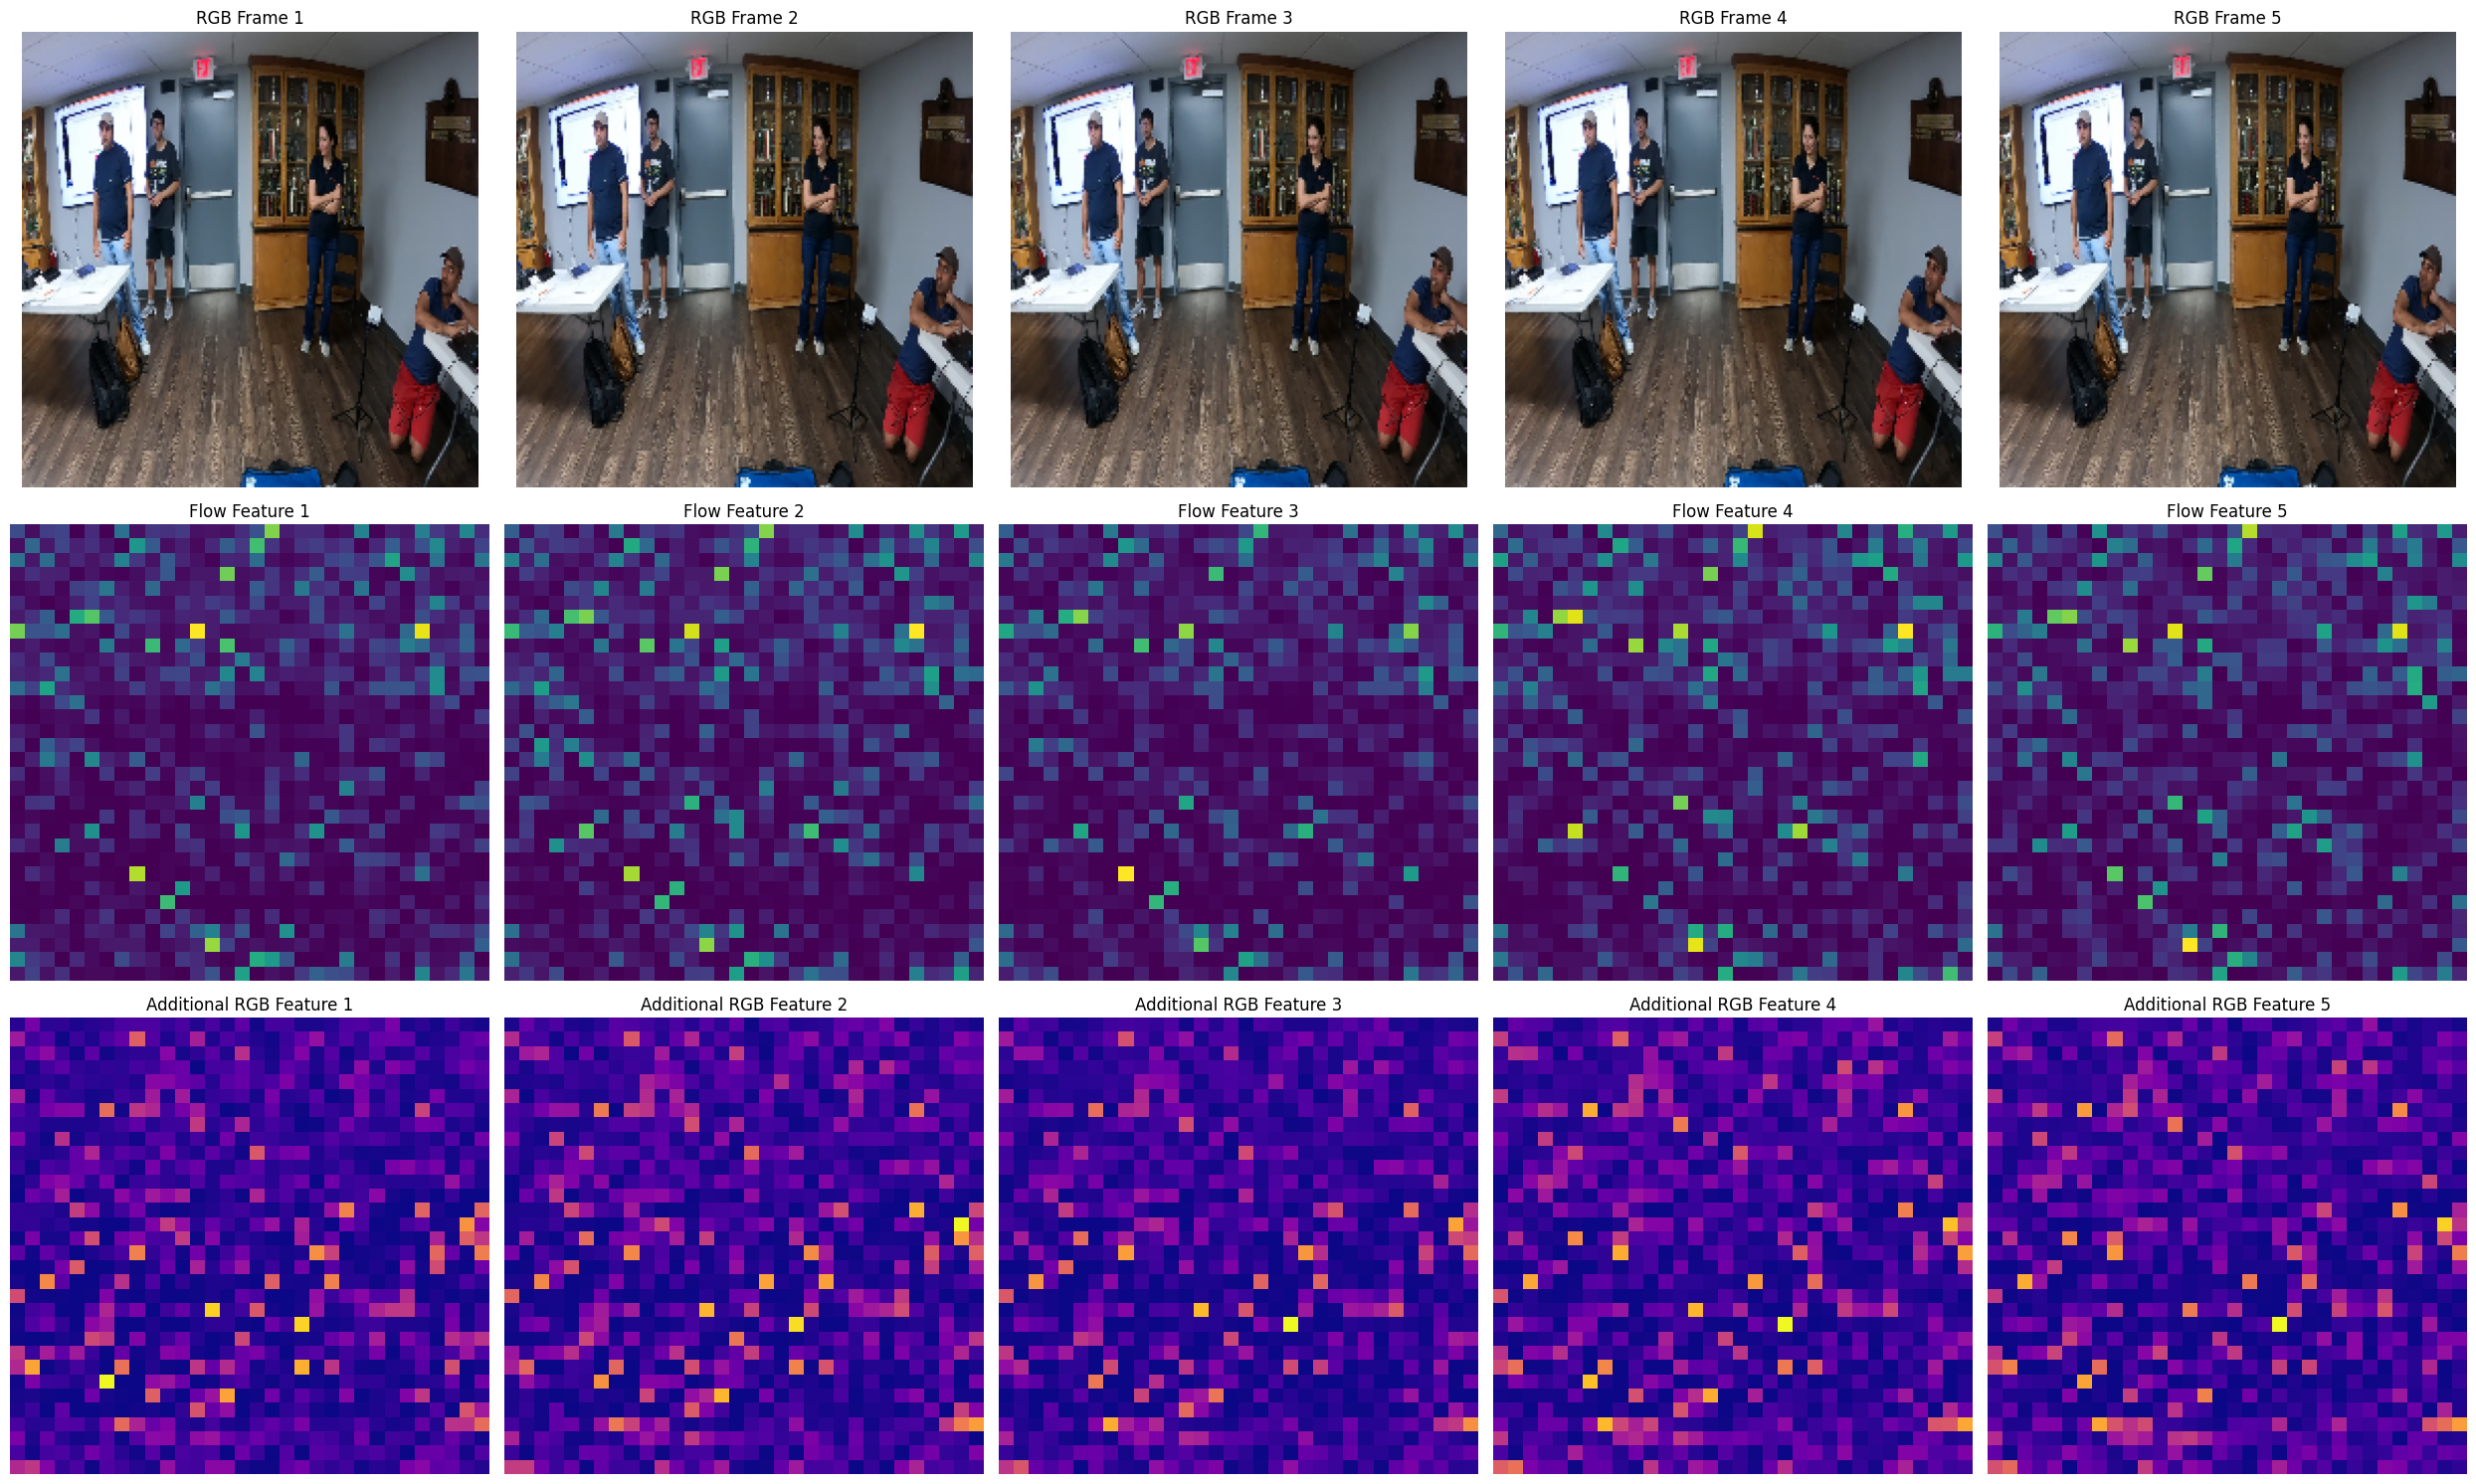

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rgb_and_flow(rgb_frames, flow_frames, rgb_feature):
    # Assume rgb_frames is of shape (frames, height, width, 3) and flow_frames is (frames, 1024)
    num_frames = rgb_frames.shape[0]
    
    fig, axes = plt.subplots( 3,num_frames, figsize=(num_frames * 5, 15))

    for i in range(num_frames):
        rgb_image = rgb_frames[i].permute(1, 2, 0).cpu().numpy()
        
        # Plot RGB frame
        axes[ 0,i].imshow(rgb_image)
        axes[ 0,i].axis('off')
        axes[ 0,i].set_title(f"RGB Frame {i+1}")
        
        # Plot flow data as a heatmap for the corresponding frame
        axes[ 1,i].imshow(flow_frames[i].reshape(32, 32), cmap='viridis', aspect='auto')  # assuming 1024 is reshaped to 32x32
        axes[ 1,i].axis('off')
        axes[ 1,i].set_title(f"Flow Feature {i+1}")
        
        
        # Plot the  feature as a heatmap
        rgb_image = rgb_feature[i].cpu().numpy().reshape(32, 32)  # Reshape to 32x32
        axes[2, i].imshow(rgb_image, cmap='plasma', aspect='auto')
        axes[2, i].axis('off')
        axes[2, i].set_title(f"Additional RGB Feature {i+1}")
        
        # save each figure
        plt.savefig(f"./visualizations/frame_{i}.png")

    plt.tight_layout()
    plt.show()

# Example usage with your batch data
plot_rgb_and_flow(batch['frames'][0][10:15], batch['flow'][0][10:15], batch['rgb'][0][10:15])


In [6]:
! ffmpeg

ffmpeg version 4.3 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/opt/conda/conda-bld/ffmpeg_1597178665428/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeh --cc=/opt/conda/conda-bld/ffmpeg_1597178665428/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libsw

424


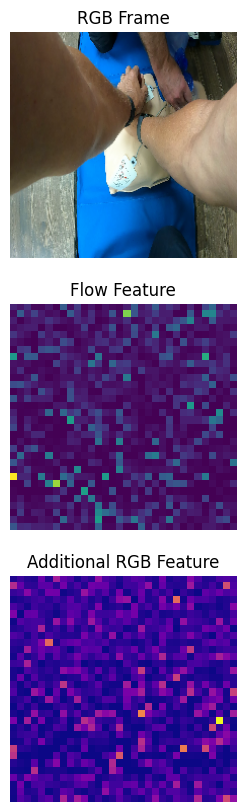

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

def animate_rgb_and_flow(rgb_frames, flow_frames, additional_rgb):
    num_frames = rgb_frames.shape[0]
    
    fig, axes = plt.subplots(3, 1, figsize=(6, 10))
    
    # Initialize the images that will be updated
    rgb_im = axes[0].imshow(np.zeros((rgb_frames.shape[2], rgb_frames.shape[3], 3)))
    flow_im = axes[1].imshow(np.zeros((32, 32)), cmap='viridis')
    add_rgb_im = axes[2].imshow(np.zeros((32, 32)), cmap='plasma')
    
    axes[0].set_title('RGB Frame')
    axes[1].set_title('Flow Feature')
    axes[2].set_title('Additional RGB Feature')
    
    # Turn off axis for cleaner visuals
    for ax in axes:
        ax.axis('off')
    
    def update(frame):
        # Ensure RGB is in the range [0, 1] for display
        rgb_image = rgb_frames[frame].permute(1, 2, 0).cpu().numpy()
        rgb_im.set_data(rgb_image)
        
        # Flow and Additional RGB Features: Reshape and normalize for visualization
        flow_image = flow_frames[frame].cpu().numpy().reshape(32, 32)
        flow_im.set_data(flow_image)
        flow_im.set_clim(vmin=np.min(flow_image), vmax=np.max(flow_image))  # Set dynamic color range
        
        additional_rgb_image = additional_rgb[frame].cpu().numpy().reshape(32, 32)
        add_rgb_im.set_data(additional_rgb_image)
        add_rgb_im.set_clim(vmin=np.min(additional_rgb_image), vmax=np.max(additional_rgb_image))  # Set dynamic color range
        
        return [rgb_im, flow_im, add_rgb_im]
    
    # Create animation
    ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=200, blit=True)
    
    # Save as GIF using Pillow backend
    ani.save('./visualizations/animated_video.gif', writer='pillow', fps=30)
    
    plt.show()
    
min_index = batch['flow'][0].shape[0]
print(min_index)
# Example usage with your batch data
animate_rgb_and_flow(batch['frames'][0][0:min_index], batch['flow'][0], batch['rgb'][0])
